<!-- DON'T EDIT THIS CELL! -->
<!-- TYPE SHIFT+ENTER AND GO TO THE NEXT CELL -->

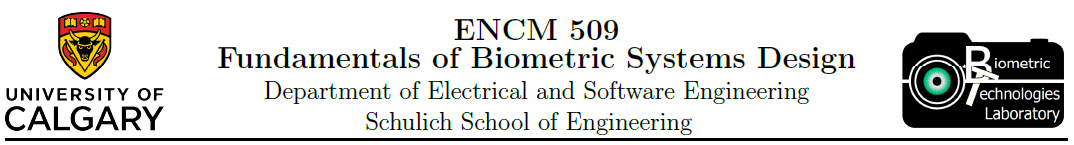

## NAME: Talha Khalil ID: 30037871 LAB : 02

# Lab 2 Report

**Introduction**: The purpose of this lab is to get a better understanding of statistical methods as well as get familiar with signature data acquisition. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d
import pandas as pd
from scipy.stats import norm

# to keep a good size for the plot figure, not the plot area!
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

- **Exercise 1** (2 marks): Consider a random sample of a normally distributed data with mean $\mu = 50$ and standard deviation $\sigma = 5$. The Scipy's function `norm.rvs(...)` is used to draw samples from a normal distribution.
    - Create another set of 1000 samples with $\mu = 50$ and $\sigma = 5$.
    - Plot the histogram with 100 bins.
    - Compare the results of the calculations of both sets. What conclusions can be drawn from the amount of samples compared with the mean and standard deviation calculated and the number of bins considered? 

Creating a normal distribution histogram using 80 samples with a $\mu$ of 50 and $\sigma$ of 5

REAL mean: 50.26; std: 4.43


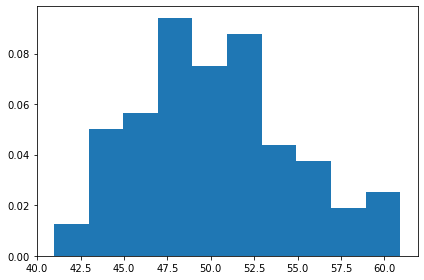

In [2]:
# Theorectical Mean and Std
mu = 50
std = 5
samples = 80

pop_norm = norm.rvs(mu, std, size=samples)
plt.hist(pop_norm, bins=10, density=True);
print('REAL mean: %.2f; std: %.2f' % (np.mean(pop_norm), np.std(pop_norm)))

Creating a normal distribution histogram using 1000 samples with a $\mu$ of 50 and $\sigma$ of 5

REAL mean: 50.03; std: 5.17


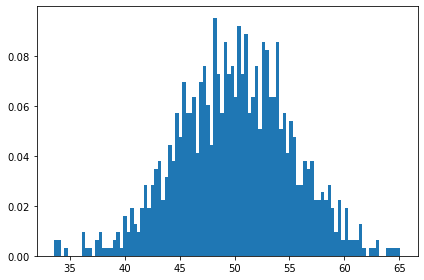

In [3]:
mu = 50
std = 5
samples = 1000
pop_norm = norm.rvs(mu, std, size=samples)
plt.hist(pop_norm, bins=100,density=True);
print('REAL mean: %.2f; std: %.2f' % (np.mean(pop_norm), np.std(pop_norm)))

**Conclusion** As more samples are taken we can observe that the values of $\mu$ and $\sigma$ are closer to their respective values of 50 and 5. And as more bins are used we can also observe that the distribtuion better represents a bell curve.

- **Exercise 2** (1 marks): Consider a sample data of the word *Biometrics* written by a "genuine" person, and an "impostor" as a signature that replicates the shape but not the original pressure. Load the sample signature provided.

First loading and graphing in 2D space the impostor and genuine signatures.

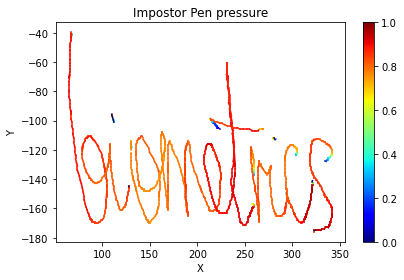

In [4]:
#Loading and Reading the CSV for the impostor
subdir = 'impostor/'
data_dir = 'signature_samples/biometrics/'+subdir
csv_file = pd.read_csv(data_dir+'1.csv')

#Extracting the relevant data from the data frame for the impostor
impostor_coord = csv_file[['X', 'Y']].to_numpy()
impostor_time = csv_file['Time'].to_numpy().reshape((-1,1))
impostor_pressure = csv_file['Pressure'].to_numpy().reshape((-1,1))

#Normalizing pressure and then creating a colormap from it
impostor_pressure_cmap = impostor_pressure / np.max(impostor_pressure)*255
impostor_pressure_cmap = impostor_pressure_cmap.astype(int)
impostor_pressure_map = cm.get_cmap('jet', np.max(impostor_pressure_cmap)+1)

#Plotting the signature in 2D
for i in range(len(impostor_pressure_cmap)-1):
    c = impostor_pressure_map(impostor_pressure_cmap[i]).squeeze()
    
    time_diff = abs(impostor_time[i+1] - impostor_time[i])
    if time_diff == 0:
        time_diff = 0.0001
        
    if time_diff < 17: # You may need to change this threshold
        im = plt.plot(impostor_coord[i:i+2,0], -impostor_coord[i:i+2,1], c=c)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Impostor Pen pressure')

sm = cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=0, vmax=1))
plt.colorbar(sm);

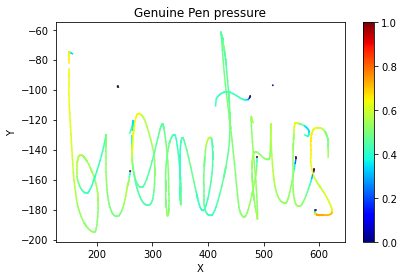

In [5]:
#Loading and Reading the CSV for the genuine signature
subdir = 'genuine/'
data_dir = 'signature_samples/biometrics/'+subdir
csv_file = pd.read_csv(data_dir+'1.csv')

#Extracting the relevant data from the data frame for the genuine
genuine_coord = csv_file[['X', 'Y']].to_numpy()
genuine_time = csv_file['Time'].to_numpy().reshape((-1,1))
genuine_pressure = csv_file['Pressure'].to_numpy().reshape((-1,1))

#Normalizing pressure and then creating a colormap from it
genuine_pressure_cmap = genuine_pressure / np.max(genuine_pressure)*255
genuine_pressure_cmap = genuine_pressure_cmap.astype(int)
genuine_pressure_map = cm.get_cmap('jet', np.max(genuine_pressure_cmap)+1)

#Plotting the signature in 2D
for i in range(len(genuine_pressure_cmap)-1):
    c = genuine_pressure_map(genuine_pressure_cmap[i]).squeeze()
    
    time_diff = abs(genuine_time[i+1] - genuine_time[i])
    if time_diff == 0:
        time_diff = 0.0001
        
    if time_diff < 17: # You may need to change this threshold
        im = plt.plot(genuine_coord[i:i+2,0], -genuine_coord[i:i+2,1], c=c)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Genuine Pen pressure')

sm = cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=0, vmax=1))
plt.colorbar(sm);

Calculating the $\mu$ and $\sigma$ of the genuine and impostor signatures' pressure and then plotting their normal distribution.


Genuine mean: 0.25; std: 0.06
Impostor mean: 0.63; std: 0.10


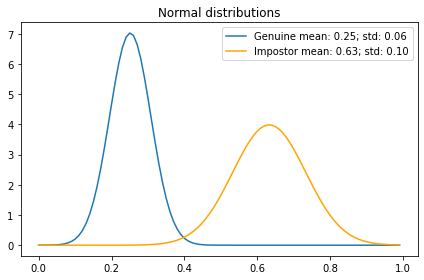

In [6]:
genuine_mu = np.mean(genuine_pressure)
genuine_std = np.std(genuine_pressure)
print('Genuine mean: %.2f; std: %.2f' % (genuine_mu, genuine_std))

impostor_mu = np.mean(impostor_pressure)
impostor_std = np.std(impostor_pressure)
print('Impostor mean: %.2f; std: %.2f' % (impostor_mu, impostor_std))

x1 = np.arange(0, 1, 0.01)
plt.plot(x1, norm.pdf(x1, loc=genuine_mu, scale=genuine_std))
plt.plot(x1, norm.pdf(x1, loc=impostor_mu, scale=impostor_std), color='orange')
plt.legend(['Genuine mean: %.2f; std: %.2f' % (genuine_mu, genuine_std), 
            'Impostor mean: %.2f; std: %.2f' % (impostor_mu, impostor_std)])
plt.title('Normal distributions');

- **Exercise 3** (1 mark): The code to calculate velocity and plot velocity map of one signature, provided in this lab, has the following `if` statement: `if time_diff == 0:`. Explain why it is necessary.

In [7]:
#Function for calculating velocity
def calc_velocity(time, coords):
    vel = np.zeros((len(time)-1, 1))

    for i in range(len(time)-1):
        distance = np.sqrt((coords[i+1,0] - coords[i,0])**2 +
                           (coords[i+1,1] - coords[i,1])**2)
        
        # if too fast time_diff = 0
        time_diff = time[i+1] - time[i]
        if time_diff == 0:
            time_diff = 0.0001

        vel[i] = distance / time_diff
        vel[i] = int(vel[i] * 1000) + 1

    vel = np.insert(vel, 0, 1)
    vel = vel / np.max(vel) * 255
    vel = vel.astype(int)
    
    return vel

The reason why we have the `if time_diff == 0` is to avoid having a divide by 0 error when calculating velocity. 

Plotting velocity:

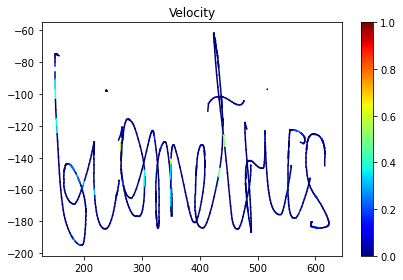

In [8]:
vel = calc_velocity(genuine_time, genuine_coord)
velmap = cm.get_cmap('jet', np.max(vel)+1)

for i in range(len(vel)-1):
    c = velmap(vel[i])
    
    time_diff = abs(genuine_time[i+1] - genuine_time[i])
        
    if time_diff < 17: # You may need to change this threshold
        plt.plot(genuine_coord[i:i+2,0], -genuine_coord[i:i+2,1], c=c)

plt.title('Velocity')
sm = cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=0, vmax=1))
plt.colorbar(sm)

Plotting pressure in 3D:

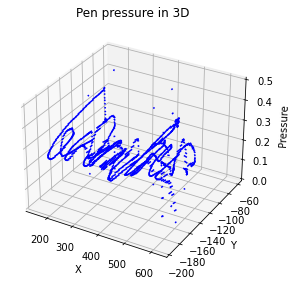

In [9]:
ax = plt.axes(projection='3d')

for i in range(len(genuine_coord)-1):
    time_diff = abs(genuine_time[i+1] - genuine_time[i])
        
    if time_diff < 18: # You may need to change this threshold
        ax.plot3D(genuine_coord[i:i+2,0], -genuine_coord[i:i+2,1], genuine_pressure[i], color='blue')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Pressure')
ax.set_title('Pen pressure in 3D');

- **Exercise 4** (3 marks): Now  perform statistical analysis of pressure and velocity distribution  across average values of pressure or 30 signatures of the same person. We will represent the pressure of each signature by its average (mean) value, and then consider the distribution of these average values across genuine signatures. Consider 30 genuine signatures (yours or pre-recorded sample set, part a), and calculate average (mean) values and deviation from average (which will be calculated using standard deviation) for pressure. Plot a normal distribution of the average pressure values across the 30 signatures of the same individual. Perform the same for velocity. 

In [10]:
# columns: mean_vel, std_vel, mean_prs, std_prs
genuine_stats_measures = np.zeros((30,4))

data_dir = 'signature_samples/Talha_Signatures/'

# using 10-30 signatures
for i in range(30):
    csv_file = pd.read_csv(data_dir + 'T%d.csv' % (i))
    
    coord1 = csv_file[['X', 'Y']].to_numpy()
    time1 = csv_file['Time'].to_numpy().reshape((-1,1))
    prs1 = csv_file['Pressure'].to_numpy().reshape((-1,1))

    vel = calc_velocity(time1, coord1)
    
    genuine_stats_measures[i, 0] = np.mean(vel)
    genuine_stats_measures[i, 1] = np.std(vel)
    
    genuine_stats_measures[i, 2] = np.mean(prs1)
    genuine_stats_measures[i, 3] = np.std(prs1)
    
    print('#%d - pressure: %.2f; velocity: %.2f' %\
          (i, np.mean(prs1), np.mean(vel)))

#0 - pressure: 0.67; velocity: 49.01
#1 - pressure: 0.65; velocity: 47.98
#2 - pressure: 0.69; velocity: 51.72
#3 - pressure: 0.67; velocity: 52.35
#4 - pressure: 0.68; velocity: 45.52
#5 - pressure: 0.63; velocity: 55.69
#6 - pressure: 0.68; velocity: 54.29
#7 - pressure: 0.70; velocity: 45.59
#8 - pressure: 0.74; velocity: 62.65
#9 - pressure: 0.77; velocity: 39.58
#10 - pressure: 0.72; velocity: 49.88
#11 - pressure: 0.74; velocity: 41.30
#12 - pressure: 0.77; velocity: 42.24
#13 - pressure: 0.78; velocity: 48.88
#14 - pressure: 0.77; velocity: 48.62
#15 - pressure: 0.78; velocity: 48.81
#16 - pressure: 0.68; velocity: 48.94
#17 - pressure: 0.75; velocity: 45.37
#18 - pressure: 0.76; velocity: 47.94
#19 - pressure: 0.74; velocity: 47.75
#20 - pressure: 0.73; velocity: 44.86
#21 - pressure: 0.70; velocity: 47.87
#22 - pressure: 0.75; velocity: 51.90
#23 - pressure: 0.74; velocity: 43.05
#24 - pressure: 0.74; velocity: 50.01
#25 - pressure: 0.69; velocity: 46.45
#26 - pressure: 0.69; 

Genuine Pressure mean: 0.72; std: 0.04
Genuine Velocity mean: 49.16; std: 5.03


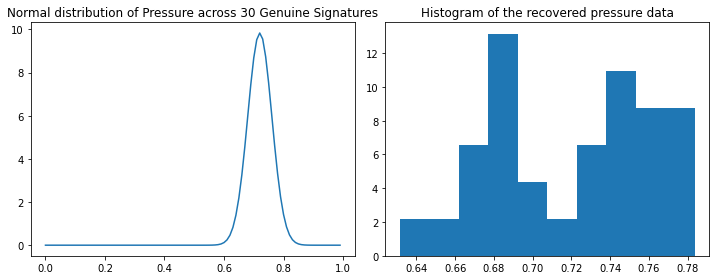

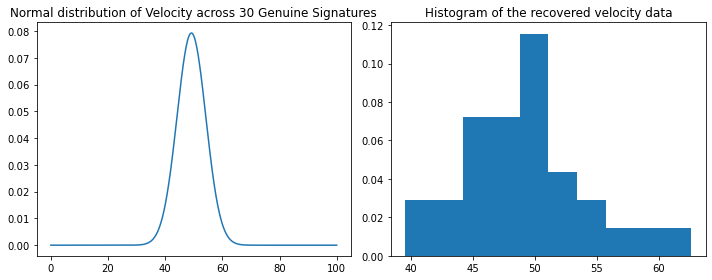

In [11]:
genuine_stats_measures_pressure_std = np.std(genuine_stats_measures[:,2])
genuine_stats_measures_pressure_mean = np.mean(genuine_stats_measures[:,2])

x = np.arange(0, 1, 0.01)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(x, norm.pdf(x, loc=genuine_stats_measures_pressure_mean, scale=genuine_stats_measures_pressure_std))
plt.title('Normal distribution of Pressure across 30 Genuine Signatures');

plt.subplot(1,2,2)
plt.hist(genuine_stats_measures[:,2], density=True);
plt.title('Histogram of the recovered pressure data');

print('Genuine Pressure mean: %.2f; std: %.2f' % (genuine_stats_measures_pressure_mean, genuine_stats_measures_pressure_std))

genuine_stats_measures_velocity_std = np.std(genuine_stats_measures[:,0])
genuine_stats_measures_velocity_mean = np.mean(genuine_stats_measures[:,0])

x = np.arange(0, 100, 0.01)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(x, norm.pdf(x, loc=genuine_stats_measures_velocity_mean, scale=genuine_stats_measures_velocity_std))
plt.title('Normal distribution of Velocity across 30 Genuine Signatures');

plt.subplot(1,2,2)
plt.hist(genuine_stats_measures[:,0], density=True);
plt.title('Histogram of the recovered velocity data');
print('Genuine Velocity mean: %.2f; std: %.2f' % (genuine_stats_measures_velocity_mean, genuine_stats_measures_velocity_std))

- **Exercise 5** (3 marks): Perform statistical analysis of average pressure and velocity distribution across 30 impostor signatures. As an "impostor", you can use either the 30 "forged" signatures (or part $b$ of the pre-recorded set), or 30 writings by yourself, of different shape/word (or part $c$ of the pre-recorded set). Represent the pressure (or velocity) of each signature by its average (mean), and then consider the distribution of these averages across 30 impostor signatures. How different are those distributions for "genuine" signatures from Exercise 4 and the "impostor" from Exercise 5?

In [12]:
# columns: mean_vel, std_vel, mean_prs, std_prs
impostor_stats_measures = np.zeros((30,4))

data_dir = 'signature_samples/Shelby_Forging_Talha/'

# using 10-30 signatures
for i in range(30):
    csv_file = pd.read_csv(data_dir + 'ST%d.csv' % (i))
    
    coord1 = csv_file[['X', 'Y']].to_numpy()
    time1 = csv_file['Time'].to_numpy().reshape((-1,1))
    prs1 = csv_file['Pressure'].to_numpy().reshape((-1,1))

    vel = calc_velocity(time1, coord1)
    
    impostor_stats_measures[i, 0] = np.mean(vel)
    impostor_stats_measures[i, 1] = np.std(vel)
    
    impostor_stats_measures[i, 2] = np.mean(prs1)
    impostor_stats_measures[i, 3] = np.std(prs1)
    
    print('#%d - pressure: %.2f; velocity: %.2f' %\
          (i, np.mean(prs1), np.mean(vel)))

#0 - pressure: 0.43; velocity: 43.80
#1 - pressure: 0.46; velocity: 26.75
#2 - pressure: 0.45; velocity: 31.73
#3 - pressure: 0.50; velocity: 41.34
#4 - pressure: 0.56; velocity: 37.32
#5 - pressure: 0.53; velocity: 45.91
#6 - pressure: 0.52; velocity: 46.35
#7 - pressure: 0.50; velocity: 46.76
#8 - pressure: 0.54; velocity: 46.57
#9 - pressure: 0.53; velocity: 45.18
#10 - pressure: 0.54; velocity: 36.17
#11 - pressure: 0.53; velocity: 34.03
#12 - pressure: 0.52; velocity: 41.38
#13 - pressure: 0.52; velocity: 48.00
#14 - pressure: 0.56; velocity: 44.33
#15 - pressure: 0.54; velocity: 45.30
#16 - pressure: 0.60; velocity: 41.59
#17 - pressure: 0.57; velocity: 38.68
#18 - pressure: 0.58; velocity: 48.99
#19 - pressure: 0.59; velocity: 41.82
#20 - pressure: 0.53; velocity: 37.43
#21 - pressure: 0.55; velocity: 41.68
#22 - pressure: 0.53; velocity: 36.33
#23 - pressure: 0.57; velocity: 43.47
#24 - pressure: 0.57; velocity: 35.90
#25 - pressure: 0.57; velocity: 46.60
#26 - pressure: 0.57; 

Impostor Pressure mean: 0.54; std: 0.04
Impostor Velocity mean: 41.50; std: 5.75


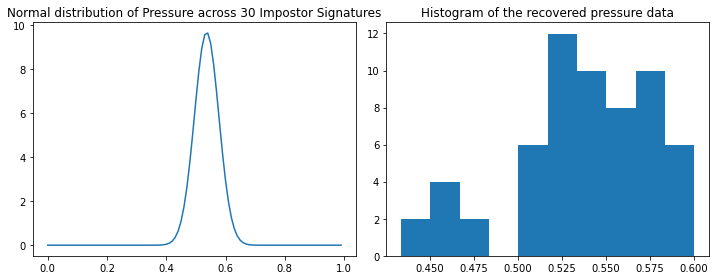

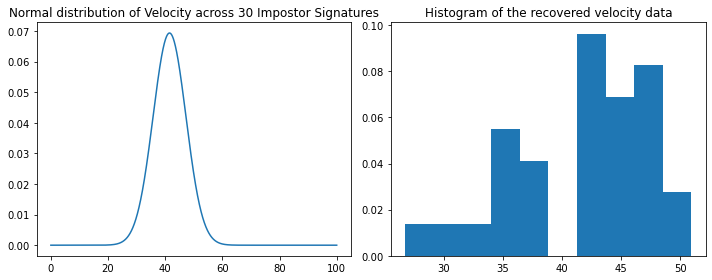

In [13]:
impostor_stats_measures_pressure_std = np.std(impostor_stats_measures[:,2])
impostor_stats_measures_pressure_mean = np.mean(impostor_stats_measures[:,2])

x = np.arange(0, 1, 0.01)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(x, norm.pdf(x, loc=impostor_stats_measures_pressure_mean, scale=impostor_stats_measures_pressure_std))
plt.title('Normal distribution of Pressure across 30 Impostor Signatures');

plt.subplot(1,2,2)
plt.hist(impostor_stats_measures[:,2], density=True);
plt.title('Histogram of the recovered pressure data');

print('Impostor Pressure mean: %.2f; std: %.2f' % (impostor_stats_measures_pressure_mean, impostor_stats_measures_pressure_std))

impostor_stats_measures_velocity_std = np.std(impostor_stats_measures[:,0])
impostor_stats_measures_velocity_mean = np.mean(impostor_stats_measures[:,0])

x = np.arange(0, 100, 0.01)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(x, norm.pdf(x, loc=impostor_stats_measures_velocity_mean, scale=impostor_stats_measures_velocity_std))
plt.title('Normal distribution of Velocity across 30 Impostor Signatures');

plt.subplot(1,2,2)
plt.hist(impostor_stats_measures[:,0], density=True);
plt.title('Histogram of the recovered velocity data');
print('Impostor Velocity mean: %.2f; std: %.2f' % (impostor_stats_measures_velocity_mean, impostor_stats_measures_velocity_std))


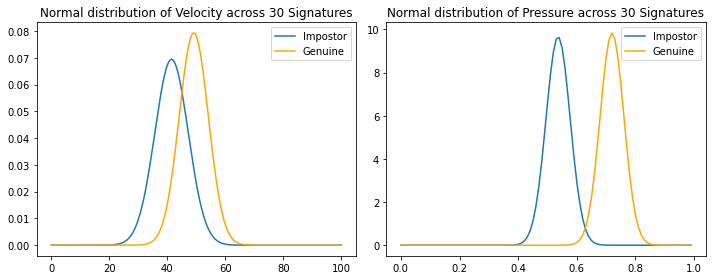

In [14]:
x = np.arange(0, 100, 0.01)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(x, norm.pdf(x, loc=impostor_stats_measures_velocity_mean, scale=impostor_stats_measures_velocity_std))
plt.plot(x, norm.pdf(x, loc=genuine_stats_measures_velocity_mean, scale=genuine_stats_measures_velocity_std), color='orange')
plt.legend(['Impostor', 'Genuine'])
plt.title('Normal distribution of Velocity across 30 Signatures');

plt.subplot(1,2,2)
x = np.arange(0, 1, 0.01)
plt.plot(x, norm.pdf(x, loc=impostor_stats_measures_pressure_mean, scale=impostor_stats_measures_pressure_std))
plt.plot(x, norm.pdf(x, loc=genuine_stats_measures_pressure_mean, scale=genuine_stats_measures_pressure_std), color='orange')
plt.legend(['Impostor', 'Genuine'])
plt.title('Normal distribution of Pressure across 30 Signatures');


These distributions are different than that of the genuine signature. Where the genuine signature had a pressure and velocity mean of 0.72, 49.16 where as the impostor had 0.54 and 41.50 respectively. However, what's interesting is that the standard deviation for the pressure and velocity are close for both values which could be attributed to the persons' having a similar standard deviation or be a characteristic of the tablets. (The standard deviation of pressure and velocity for the genuine was 0.04, and 5.03 respectively vs 0.04 and 5.75 for respectively.) From looking at the direct comparison between the impostor and genuine in this case it seems that the pressure would be a better indicator of forgery. But it is still made clear that when used in conjunction both velocity and pressure can be used as a good indicator of forgery.


**Lab Conclusion** The lab was a good overview of how to perform statisical analysis as well as how to analayze and acquire biometric signature data. From the lab it can be concluded that two individuals who might have visually the same signature can have vastly different pressure and velocity, from which a forgery can be determined.